This notebook is used to analyze training results. In order to get training results first, do the following:

**To generate Kepler dataset**
* generate 2D Kepler dataset by running "python generate_kepler_cv.py" ("cv" means "continuous variables")

**To train classification transformers**
* train networks by runnnig "python kepler.py"
* be sure to change to your sweeping parameters in the main() function of kepler.py
* results are saved in the folder "./results/kepler"

**To train regression transformers**
* train networks by runnnig "python kepler_cv.py"
* be sure to change to your sweeping parameters in the main() function of kepler_cv.py
* results are saved in the folder "./results/kepler_cv"

Text(0.5, 1.0, 'losses')

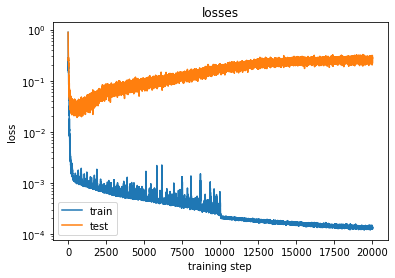

In [2]:
import matplotlib.pyplot as plt
import numpy as np

seed = 1
num_trajectories = 10
noise_scale = 0.03
n_embd = 32
n_layer = 2
n_head = 1

# load results from ./results/kepler_cv/results_seed_1_num_trajectories_1000_noise_scale_0.1_n_embd_16_n_layer_2_n_head_1.npz
loaded = np.load(f'./results/kepler_cv/results_num_trajectories_{num_trajectories}_noise_scale_{noise_scale}.npz', allow_pickle=True)
loaded_results = {key: loaded[key] for key in loaded.keys()}

plt.plot(loaded_results['train_losses'])
plt.plot(loaded_results['test_losses'])
#plt.xscale('log')
plt.yscale('log')

plt.xlabel('training step')
plt.ylabel('loss')
plt.legend(['train', 'test'])
plt.title('losses')


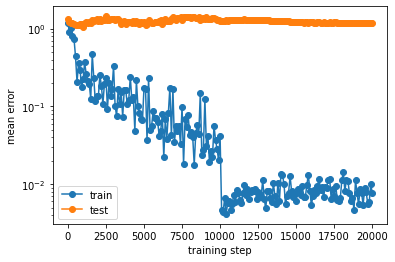

In [3]:
mean_errors_train = []
mean_errors_test = []
eval_steps = []
for i in range(len(loaded_results['eval_results'])):
    mean_errors_train.append(loaded_results['eval_results'][i]['error_stats_train']['mean_error'])
    mean_errors_test.append(loaded_results['eval_results'][i]['error_stats_test']['mean_error'])
    eval_steps.append(loaded_results['eval_steps'][i])

plt.plot(eval_steps, mean_errors_train, marker='o')
plt.plot(eval_steps, mean_errors_test, marker='o')
#plt.xscale('log')
plt.yscale('log')
plt.ylabel('mean error')
plt.xlabel('training step')
plt.legend(['train', 'test'])


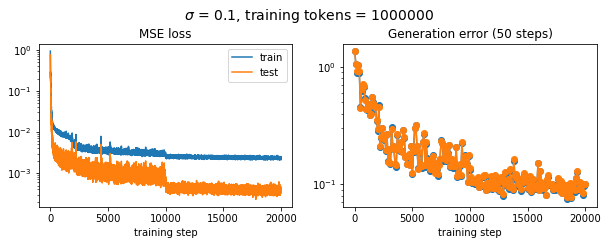

In [16]:
seed = 1
num_trajectories = 10000
noise_scale = 0.1
n_embd = 32
n_layer = 2
n_head = 1

plt.figure(figsize = (10, 3))

plt.subplot(1, 2, 1)
# load results from ./results/kepler_cv/results_seed_1_num_trajectories_1000_noise_scale_0.1_n_embd_16_n_layer_2_n_head_1.npz
loaded = np.load(f'./results/kepler_cv/results_num_trajectories_{num_trajectories}_noise_scale_{noise_scale}.npz', allow_pickle=True)
loaded_results = {key: loaded[key] for key in loaded.keys()}

plt.plot(loaded_results['train_losses'])
plt.plot(loaded_results['test_losses'])
#plt.xscale('log')
plt.yscale('log')

plt.xlabel('training step')
#plt.ylabel('loss')
plt.legend(['train', 'test'])
plt.title('MSE loss')

plt.subplot(1, 2, 2)
mean_errors_train = []
mean_errors_test = []
eval_steps = []
for i in range(len(loaded_results['eval_results'])):
    mean_errors_train.append(loaded_results['eval_results'][i]['error_stats_train']['mean_error'])
    mean_errors_test.append(loaded_results['eval_results'][i]['error_stats_test']['mean_error'])
    eval_steps.append(loaded_results['eval_steps'][i])

plt.plot(eval_steps, mean_errors_train, marker='o')
plt.plot(eval_steps, mean_errors_test, marker='o')
#plt.xscale('log')
plt.yscale('log')
#plt.ylabel('mean error')
plt.xlabel('training step')
plt.title('Generation error (50 steps)')
#plt.legend(['train', 'test'])

plt.suptitle(r'$\sigma$ = {}, training tokens = {}'.format(noise_scale, 100*num_trajectories), y=1.05, fontsize=14)

plt.savefig('./plots/app4/kepler_noise_scale_{}_training_tokens_{}.png'.format(noise_scale, 100*num_trajectories), dpi=300, bbox_inches='tight')

In [6]:
loaded_results['eval_results'][-1]['probe_results']

{'input_embed': {'F_magnitude': {'r2': 2.082293603489216e-05},
  'F_direction_x': {'r2': 0.8348617447169493},
  'F_direction_y': {'r2': 0.834565285254994},
  'Fx': {'r2': 0.054421594920274985},
  'Fy': {'r2': 0.06071806486188569},
  'r': {'r2': 0.0005347544960719874},
  'inv_r': {'r2': 0.00010536576036113132},
  'r_squared': {'r2': 0.0007009136370155211},
  'inv_r_squared': {'r2': 2.0824768952820705e-05},
  'inv_r_cubed': {'r2': 3.2033507562090335e-06},
  'x': {'r2': 0.9999999999999791},
  'y': {'r2': 0.999999999999961}},
 'after_pos_emb': {'F_magnitude': {'r2': 0.029315273728447},
  'F_direction_x': {'r2': 0.8326073522314192},
  'F_direction_y': {'r2': 0.8279777187277627},
  'Fx': {'r2': 0.05442381700196064},
  'Fy': {'r2': 0.06048560177735973},
  'r': {'r2': 0.06136780852298418},
  'inv_r': {'r2': 0.04378941718636209},
  'r_squared': {'r2': 0.06908630363333212},
  'inv_r_squared': {'r2': 0.029315274655870804},
  'inv_r_cubed': {'r2': 0.01546514189478787},
  'x': {'r2': 0.997219197843

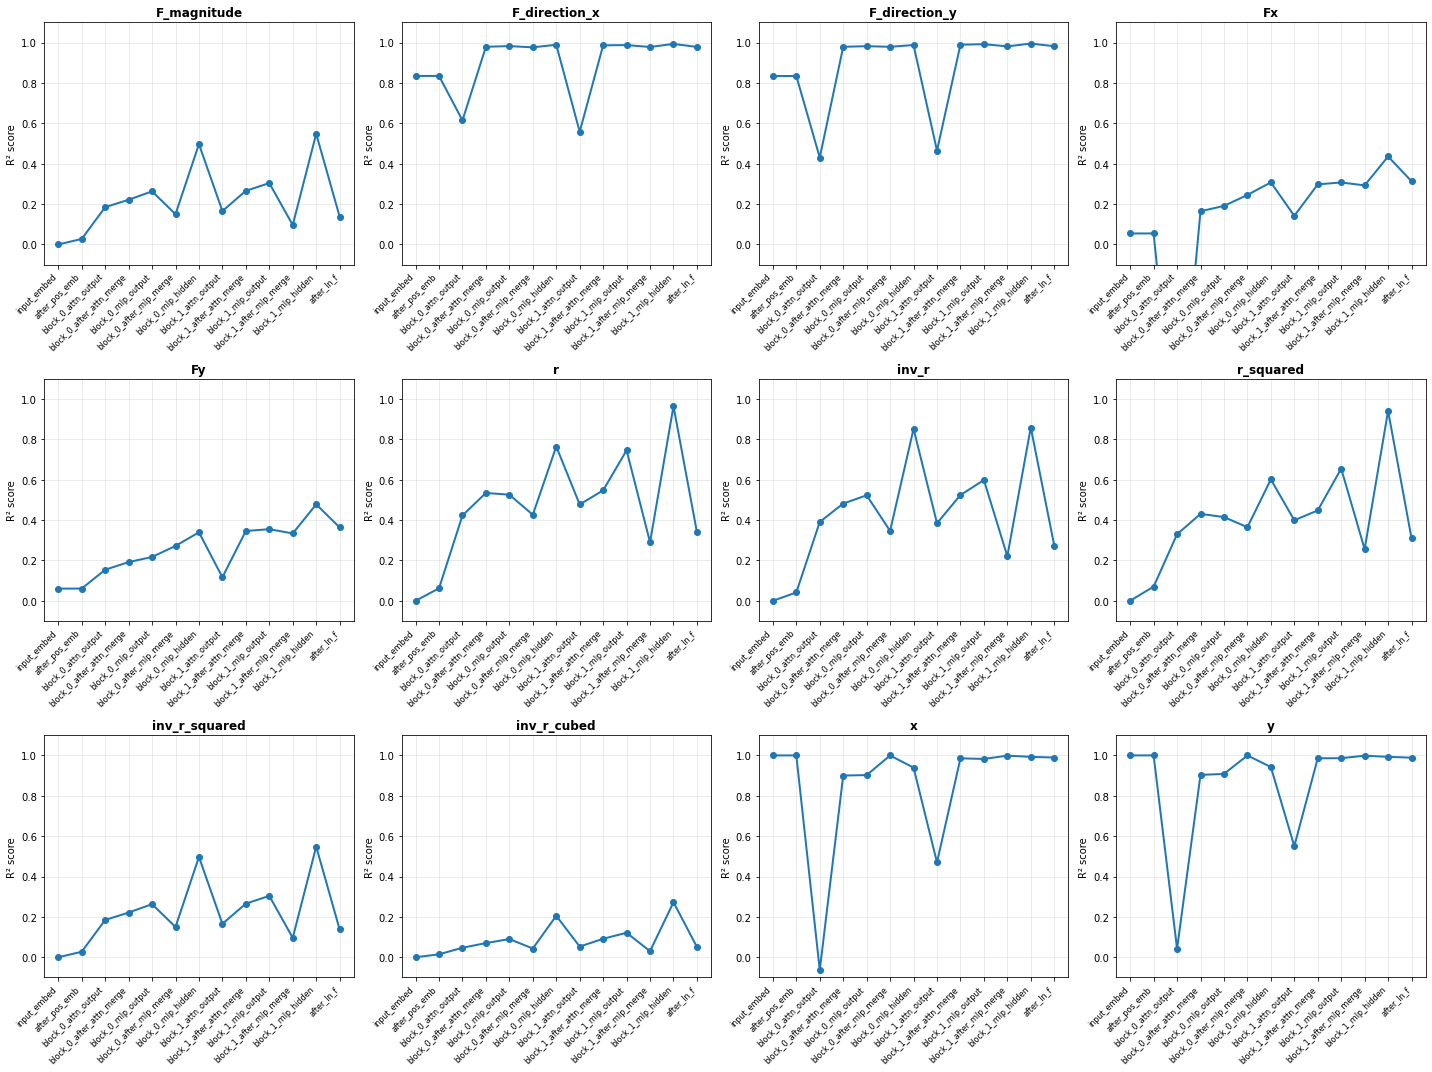

In [42]:
# Extract probe results from the last evaluation
probe_results = loaded_results['eval_results'][-1]['probe_results']

# Define the layer order for plotting
layer_order = [
    'input_embed',
    'after_pos_emb',
]

# Add block layers in order
n_layer = n_layer
for block_idx in range(n_layer):
    layer_order.extend([
        f'block_{block_idx}_attn_output',
        f'block_{block_idx}_after_attn_merge',
        f'block_{block_idx}_mlp_output',
        f'block_{block_idx}_after_mlp_merge',
        f'block_{block_idx}_mlp_hidden',
    ])

layer_order.append('after_ln_f')

# Filter layer_order to only include layers that exist in probe_results
available_layers = [layer for layer in layer_order if layer in probe_results]

# Define target variables to plot
target_variables = [
    'F_magnitude',
    'F_direction_x',
    'F_direction_y',
    'Fx',
    'Fy',
    'r',
    'inv_r',
    'r_squared',
    'inv_r_squared',
    'inv_r_cubed',
    'x',
    'y'
]

# Create plots for each target variable
fig, axes = plt.subplots(3, 4, figsize=(20, 15))
axes = axes.flatten()

for idx, target_var in enumerate(target_variables):
    ax = axes[idx]
    
    # Extract R² scores for this target variable across all layers
    r2_scores = []
    layer_names = []
    
    for layer in available_layers:
        if layer in probe_results and target_var in probe_results[layer]:
            r2_scores.append(probe_results[layer][target_var]['r2'])
            layer_names.append(layer)
    
    # Plot
    if len(r2_scores) > 0:
        x_positions = range(len(layer_names))
        ax.plot(x_positions, r2_scores, 'o-', linewidth=2, markersize=6)
        ax.set_xticks(x_positions)
        ax.set_xticklabels(layer_names, rotation=45, ha='right', fontsize=8)
        ax.set_ylabel('R² score', fontsize=10)
        ax.set_title(f'{target_var}', fontsize=12, fontweight='bold')
        ax.grid(True, alpha=0.3)
        ax.set_ylim([-0.1, 1.1])
    else:
        ax.text(0.5, 0.5, f'No data for {target_var}', 
                ha='center', va='center', transform=ax.transAxes)
        ax.set_title(f'{target_var}', fontsize=12)

plt.tight_layout()
plt.show()


In [1]:
# get mean error
import matplotlib.pyplot as plt
import numpy as np


seed = 1
num_trajectoriess = [10, 100, 1000, 10000, 100000]
noise_scales = [0.0, 0.01, 0.03, 0.1, 0.3, 1.0]
n_embd = 32
n_layer = 2
n_head = 1


mean_errors_trainss = []
mean_errors_testss = []

for num_trajectories in num_trajectoriess:
    mean_errors_trains = []
    mean_errors_tests = []
    for noise_scale in noise_scales:
        # load results from ./results/kepler_cv/results_seed_1_num_trajectories_1000_noise_scale_0.1_n_embd_16_n_layer_2_n_head_1.npz
        loaded = np.load(f'./results/kepler_cv/results_num_trajectories_{num_trajectories}_noise_scale_{noise_scale}.npz', allow_pickle=True)
        loaded_results = {key: loaded[key] for key in loaded.keys()}
        mean_errors_trains.append(np.min(loaded_results['eval_results'][-1]['error_stats_train']['mean_error']))
        mean_errors_tests.append(np.min(loaded_results['eval_results'][-1]['error_stats_test']['mean_error']))
    mean_errors_trainss.append(mean_errors_trains)
    mean_errors_testss.append(mean_errors_tests)


#plt.xscale('log')
#plt.yscale('log')



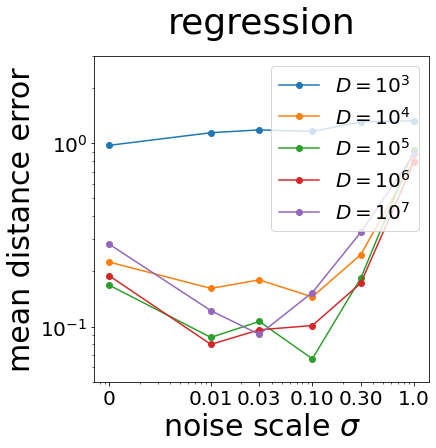

In [5]:
# Map noise_scale=0 to a small value for log scale, then use custom ticks
noise_scales_plot = [0.001 if x == 0 else x for x in noise_scales]

plt.figure(figsize=(6, 6))

for i in range(len(num_trajectoriess)):
    plt.plot(noise_scales_plot[:],mean_errors_testss[i][:], marker='o')

plt.yscale('log')
plt.xscale('log')

# Set custom x-axis ticks to show 0 nicely
tick_positions = [0.001] + [x for x in noise_scales if x > 0]
tick_labels = ['0'] + [f'{x:.2f}' if x < 1 else f'{x:.1f}' for x in noise_scales if x > 0]
plt.xticks(tick_positions, tick_labels, fontsize=20)
plt.yticks(fontsize=20)

plt.xlabel(r'noise scale $\sigma$', fontsize=30)
plt.ylabel('mean distance error', fontsize=30)
plt.legend([r'$D = 10^3$', r'$D = 10^4$', r'$D = 10^5$', r'$D = 10^6$', r'$D = 10^7$'], loc='upper right', fontsize=20)
plt.title('regression', fontsize=36, y=1.05)

plt.ylim(0.05, 3)

plt.savefig('./plots/regression_noise_scale_error.png', dpi=300, bbox_inches='tight')

In [6]:
cv_error = np.min(np.array(mean_errors_testss), axis=1)
cv_error_zeronoise = np.array(mean_errors_testss)[:,0]

In [7]:
# get mean error
import matplotlib.pyplot as plt
import numpy as np


seed = 1
num_trajectoriess = [10, 100, 1000, 10000, 100000]
vocab_sizes = [16, 32, 64, 128, 256, 512]
n_embd = 32
n_layer = 2
n_head = 1


mean_errors_trainss = []
mean_errors_testss = []

for num_trajectories in num_trajectoriess:
    mean_errors_trains = []
    mean_errors_tests = []
    for vocab_size in vocab_sizes:
        # load results from ./results/kepler_cv/results_seed_1_num_trajectories_1000_noise_scale_0.1_n_embd_16_n_layer_2_n_head_1.npz
        loaded = np.load(f'./results/kepler/results_vocab_size_{vocab_size}_num_trajectories_{num_trajectories}.npz', allow_pickle=True)
        loaded_results = {key: loaded[key] for key in loaded.keys()}
        mean_errors_trains.append(np.min(loaded_results['eval_results'][-1]['train_gen_error']))
        mean_errors_tests.append(np.min(loaded_results['eval_results'][-1]['test_gen_error']))
    mean_errors_trainss.append(mean_errors_trains)
    mean_errors_testss.append(mean_errors_tests)


#plt.xscale('log')
#plt.yscale('log')



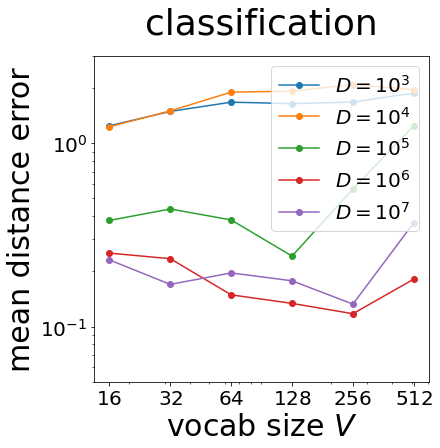

In [8]:
plt.figure(figsize=(6, 6))

for i in range(len(num_trajectoriess)):
    plt.plot(vocab_sizes, mean_errors_testss[i], marker='o')

plt.yscale('log')
plt.xscale('log')
plt.xlabel(r'vocab size $V$', fontsize=30)
plt.ylabel('mean distance error', fontsize=30)
plt.legend([r'$D = 10^3$', r'$D = 10^4$', r'$D = 10^5$', r'$D = 10^6$', r'$D = 10^7$'], loc='upper right', fontsize=20)
plt.xticks([16, 32, 64, 128, 256, 512], [r'$16$', r'$32$', r'$64$', r'$128$', r'$256$', r'$512$'], fontsize=20);
plt.yticks(fontsize=20)
plt.title('classification', fontsize=36, y=1.05)
plt.ylim(0.05, 3)

plt.savefig('./plots/classification_vocab_size_error.png', dpi=300, bbox_inches='tight')

In [10]:
error = np.min(np.array(mean_errors_testss), axis=1)
error_large_vocab = np.array(mean_errors_testss)[:,-1]

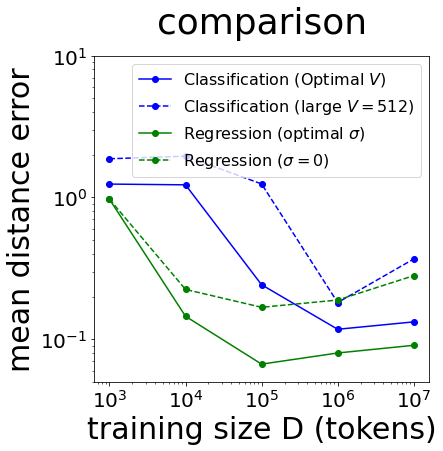

In [12]:
plt.figure(figsize=(6, 6))

plt.plot(100*np.array(num_trajectoriess), error, marker='o', color='blue')
plt.plot(100*np.array(num_trajectoriess), error_large_vocab, marker='o', color='blue', ls='--')
plt.plot(100*np.array(num_trajectoriess), cv_error, marker='o', color='green')
plt.plot(100*np.array(num_trajectoriess), cv_error_zeronoise, marker='o', color='green', ls='--')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('training size D (tokens)', fontsize=30)
plt.ylabel('mean distance error', fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend([r'Classification (Optimal $V$)', r'Classification (large $V=512$)', r'Regression (optimal $\sigma$)', r'Regression ($\sigma = 0$)'], loc='upper right', fontsize=16)
plt.title('comparison', fontsize=36, y=1.05)
plt.ylim(0.05, 10)

plt.savefig('./plots/classification_regression_error.png', dpi=300, bbox_inches='tight')
